# Machine Learning Exercise - Titanic Dataset

# <span style='font-size:0.5em'>Table of Contents</span>
 
1. [Introduction](#intro)  
2. [Libraries and Setup](#imports)  
3. [Exploratory Data Analysis](#eda)  
    - [Reading the Dataset](#loading)
    - [Features Data types](#features_dtypes)
    - [Checking Null Values](#null_data)
    - [Numerical Features Distribuition](#num_features)
    - [Categorical Features Distribuition](#cat_features)
    - [Mixed Features](#mix_features)
    - [Target Distribuition](#target_dist)
    - [Data Correlation](#data_corr)
4. [Baseline model](#baseline_model)
5. [Data wrangling](#data_wrangling)
6. [Model Pipeline](#modeling)

# <span id='intro' style='font-size:0.8em;color:#fdbf11'>1. Introduction</span>

The following questions must be answered through the data analysis:

1) What issue needs to be solved?    
2) What is the target?  
3) It's a problem of classificaton or regression? 
4) Create a model which produces the best evaluation metric. Discuss wich metrics makes more sense in the dataset context.  

### Dataset: <span style='color:#408941'>Titanic

Source: https://www.kaggle.com/c/titanic/overview

In [10]:
# download with Kaggle API
# !kaggle competitions download -c titanic

### <span style='color:#1696d2'>Data Dictionary  

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |  

### <span style='color:#1696d2'>Variable Notes


pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
  
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
  
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  
  
parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

# <span id='imports' style='font-size:0.8em;color:#fdbf11'>2. Libraries and Setup</span>

In [2]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# graphic visualization setup
sns.set()
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Lato']

# color pallete for graphics
colors ={
    'cyan': '#1696d2',
    'gray': '#5c5859',
    'black': '#000000',
    'yellow': '#fdbf11',
    'orange': '#ca5800',
    'magenta': '#af1f6b',
    'green': '#408941',
    'red': '#a4201d'
}

# terminal colors
WHITE = '\033[39m'
CYAN = '\033[36m'
GREEN = '\033[32m'
RED = '\033[31m'

# libraries version
print('Libraries versions:')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Libraries versions:
Numpy: 1.20.3
Pandas: 1.3.4
Seaborn: 0.11.2
Matplotlib: 3.4.3


# <span id='eda' style='font-size:0.8em;color:#fdbf11'>3. Exploratory Data Analysis</span>

## <span id='loading' style='font-size:0.8em;color:#1696d2'>Reading the Dataset</span>

In [309]:
file_path = '../datasets/titanic.csv'

df = pd.read_csv(file_path)

df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


## <span id='null_data' style='font-size:0.8em;color:#1696d2'>Checking Null Values</span>

In [310]:
df.isnull().sum().sum()

0

At a first glance, there is not a single null value in the dataset, however we can obeserve multiple features with value **'?'**, which indicates missing values.  
This issue can be corrected by replacing all **'?'** characters with NaN values.  

In [311]:
# convert all values with '?' to NaN
df[df=='?'] = np.nan
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Now we can calculate how many null values are in the dataset:

In [312]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [313]:
null_percent = lambda df, feature : print(f'{feature} = {round(df[feature].isnull().sum() / df.shape[0] * 100, 2)} %')
print('Null values percentage:')
null_percent(df, 'age')
null_percent(df, 'cabin')
null_percent(df, 'boat')
null_percent(df, 'body')
null_percent(df, 'home.dest')

Null values percentage:
age = 20.09 %
cabin = 77.46 %
boat = 62.87 %
body = 90.76 %
home.dest = 43.09 %


In [314]:
df.loc[:, df.isna().any()].isna().melt(value_name="missing")

,variable,missing
0,age,False
1,age,False
2,age,False
3,age,False
4,age,False
...,...,...
9158,home.dest,True
9159,home.dest,True
9160,home.dest,True
9161,home.dest,True


<Figure size 720x576 with 0 Axes>

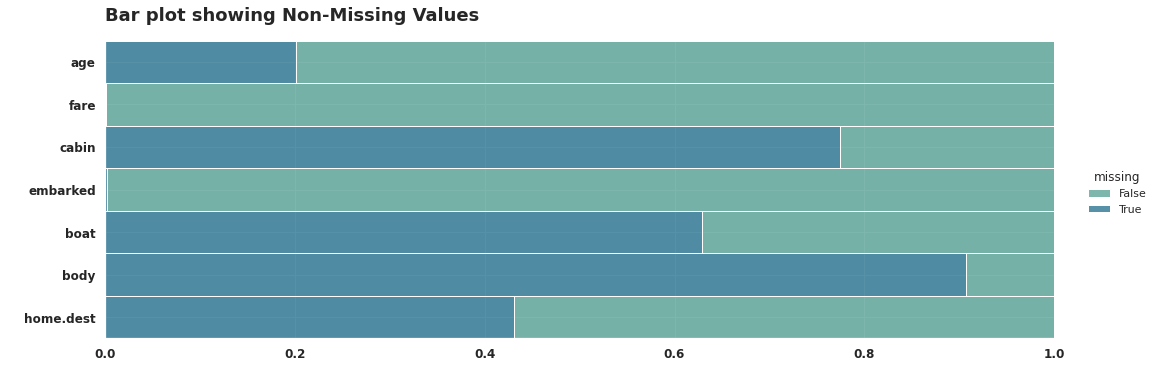

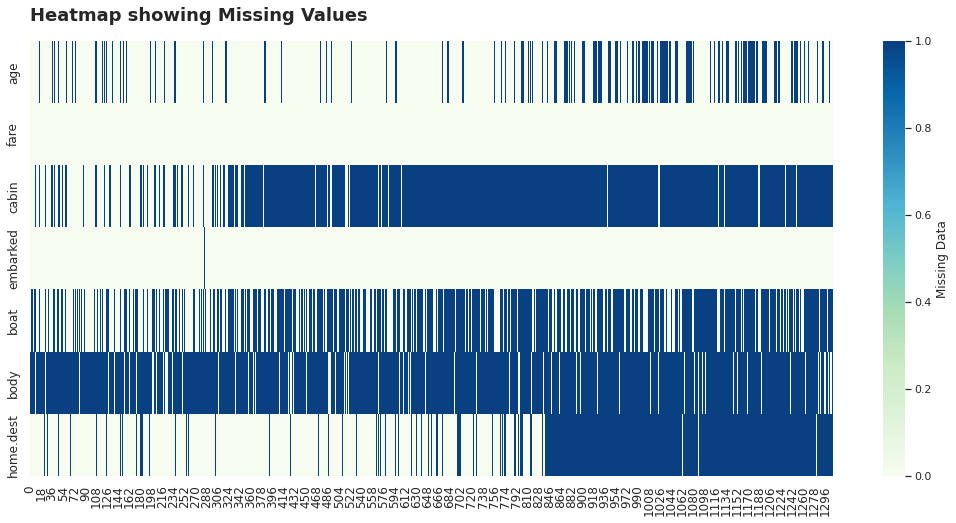

In [315]:
plt.figure(figsize=(10,8))
sns.displot(
    data=df.loc[:, df.isna().any()].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='crest'
)
plt.title('Bar plot showing Non-Missing Values', weight='bold', fontsize = 18, pad=20, loc='left')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size=12, weight = 'bold')
plt.yticks(size=12, weight = 'bold');

plt.figure(figsize=(18,8))
sns.heatmap(df.loc[:, df.isna().any()].isna().transpose(),
            cmap="GnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values', weight='bold', fontsize=18, pad=20, loc='left')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show();

**Observations**  
- Missing data appeared as '?'
- Some features contains an expressive number of null values
  
**Decisions**  
- Converted all '?' with NaN values  
- Check the following features distribuition to figure out how to adress the null values: *age*, *cabin*, *boat*, *body*, *home.dest*  

## <span id='features_dtypes' style='font-size:0.8em;color:#1696d2'>Features Analysis</span>

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1046 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1308 non-null   object
 9   cabin      295 non-null    object
 10  embarked   1307 non-null   object
 11  boat       486 non-null    object
 12  body       121 non-null    object
 13  home.dest  745 non-null    object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


### Custom function do quickly explore a single feature

In [317]:
def explorer_feature(df, feature):
    # dtype
    print(f"Dtype: {df[feature].dtype}")
    print(f"Number of unique values: {df[feature].nunique()}")
    if df[feature].nunique() <= 10: 
        print(f"Unique values: {df[feature].unique()}")
    # missing values
    print(f"Missing values: {df[feature].isna().sum()}")

### pclass  
*Variable type*: Numeric Ordinal  
*info*: Indicates wich class the passenger belongs. Order: 1 > 2 > 3  

In [318]:
explorer_feature(df, feature='pclass')

Dtype: int64
Number of unique values: 3
Unique values: [1 2 3]
Missing values: 0


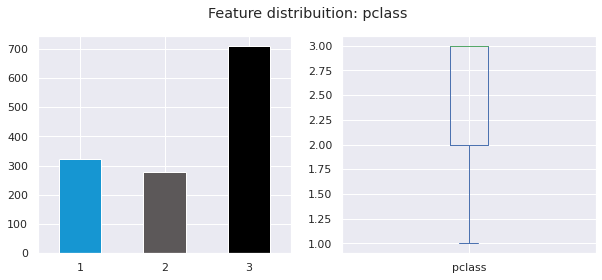

In [319]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df['pclass'].value_counts().sort_index().plot(kind='bar', color = colors.values(), ax=ax[0])
ax[0].tick_params(labelrotation=0)
df['pclass'].plot(kind='box', ax=ax[1])
plt.suptitle('Feature distribuition: pclass');

### survived  
*Variable type*: Numeric Categorical  
*info*: Indicates if the passenger survived. 0: Died; 1:Survived

In [320]:
explorer_feature(df, feature='survived')

Dtype: int64
Number of unique values: 2
Unique values: [1 0]
Missing values: 0


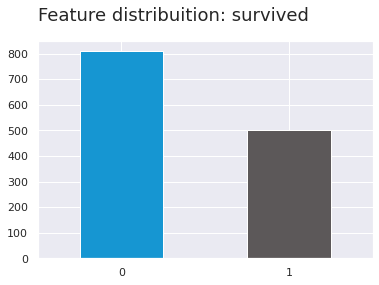

In [321]:
df['survived'].value_counts().plot(kind='bar', color=colors.values())
plt.title('Feature distribuition: survived', loc='left', fontsize=18, pad=20)
plt.xticks(rotation=0);

### name  
*Variable type*: ID   

In [323]:
#

### sex  
*Variable type*: Categorical   

In [324]:
explorer_feature(df, feature='sex')

Dtype: object
Number of unique values: 2
Unique values: ['female' 'male']
Missing values: 0


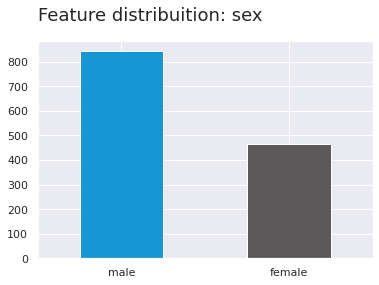

In [325]:
df['sex'].value_counts().plot(kind='bar', color=colors.values())
plt.title('Feature distribuition: sex', loc='left', fontsize=18, pad=20)
plt.xticks(rotation=0);

In [358]:
# convert to numeric values
df['sex'] = df['sex'].map({'female':'0','male':'1'}).astype('int64')

### age  
*Variable type*: Continuous   

In [327]:
explorer_feature(df, feature='age')

Dtype: object
Number of unique values: 98
Missing values: 263


In [328]:
df['age'] = df['age'].astype('float64')

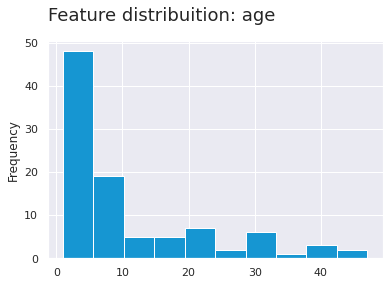

In [329]:
df['age'].value_counts().plot(kind='hist', color=colors.values())
plt.title('Feature distribuition: age', loc='left', fontsize=18, pad=20)
plt.xticks(rotation=0);

In [330]:
df[df['age']<1].age

1       0.9167
359     0.8333
427     0.6667
548     0.8333
590     0.9167
611     0.8333
657     0.7500
658     0.7500
747     0.3333
763     0.1667
1111    0.7500
1240    0.4167
Name: age, dtype: float64

*Observations*:
- Some values is less than zero.
- Data contains null values which need to be adressed later.

### sibsp  
*Variable type*: Discrete   
*info*: number of siblings/spouses  

In [331]:
explorer_feature(df, feature='sibsp')

Dtype: int64
Number of unique values: 7
Unique values: [0 1 2 3 4 5 8]
Missing values: 0


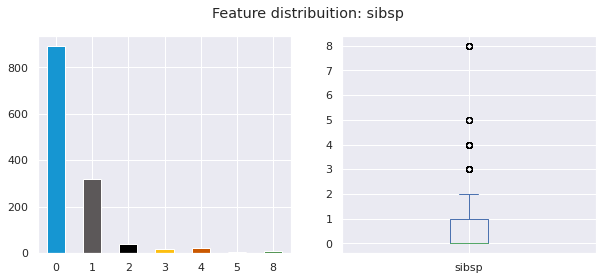

In [332]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df['sibsp'].value_counts().sort_index().plot(kind='bar', color = colors.values(), ax=ax[0])
ax[0].tick_params(labelrotation=0)
df['sibsp'].plot(kind='box', ax=ax[1])
plt.suptitle('Feature distribuition: sibsp');

### parch  
*Variable type*: Discrete   
*info*: number of parents/children    

In [333]:
explorer_feature(df, feature='parch')

Dtype: int64
Number of unique values: 8
Unique values: [0 2 1 4 3 5 6 9]
Missing values: 0


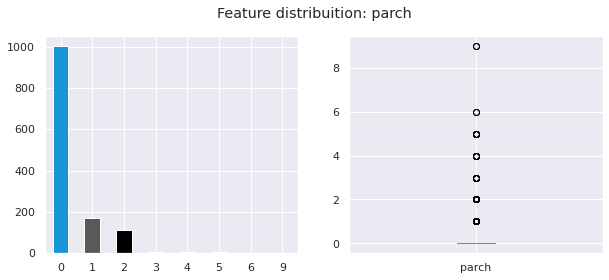

In [334]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df['parch'].value_counts().sort_index().plot(kind='bar', color = colors.values(), ax=ax[0])
ax[0].tick_params(labelrotation=0)
df['parch'].plot(kind='box', ax=ax[1])
plt.suptitle('Feature distribuition: parch');

### ticket  
*Variable type*: ID   

In [335]:
explorer_feature(df, feature='ticket')

Dtype: object
Number of unique values: 929
Missing values: 0


In [336]:
df.ticket.value_counts().head()

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
Name: ticket, dtype: int64

*Observation*:  
Ticket is a mix of numeric and alphanumeric, with some repeated vales. Correction in this feature can be adressed later.

### fare  
*Variable type*: Continuous   

In [337]:
explorer_feature(df, feature='fare')

Dtype: object
Number of unique values: 281
Missing values: 1


In [338]:
# converting type to float
df['fare'] = df['fare'].astype('float64')

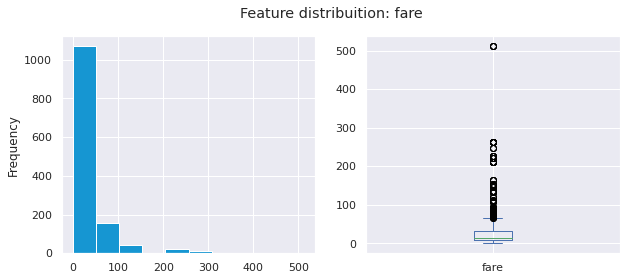

In [339]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
df['fare'].plot(kind='hist',color = colors.values(), ax=ax[0])
ax[0].tick_params(labelrotation=0)
df['fare'].plot(kind='box', ax=ax[1])
plt.suptitle('Feature distribuition: fare');

### cabin  
*Variable type*: ?   

In [340]:
explorer_feature(df, feature='cabin')

Dtype: object
Number of unique values: 186
Missing values: 1014


In [341]:
df.cabin.head()

0         B5
1    C22 C26
2    C22 C26
3    C22 C26
4    C22 C26
Name: cabin, dtype: object

*Observations*:  
Cabin has alphanumeric values, and a high ratio of null values (77.5%).   

### embarked 
*Variable type*: Categorical   
*info*: Port where the passenger embarked  

In [342]:
explorer_feature(df, feature='embarked')

Dtype: object
Number of unique values: 3
Unique values: ['S' 'C' nan 'Q']
Missing values: 2


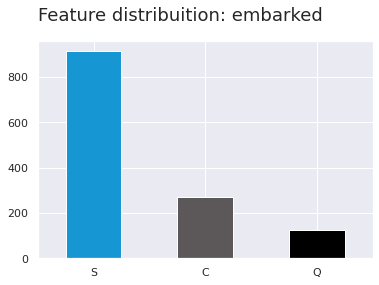

In [343]:
df['embarked'].value_counts().plot(kind='bar', color=colors.values())
plt.title('Feature distribuition: embarked', loc='left', fontsize=18, pad=20)
plt.xticks(rotation=0);

### boat 
*Variable type*: Nominal    

In [344]:
explorer_feature(df, feature='boat')

Dtype: object
Number of unique values: 27
Missing values: 823


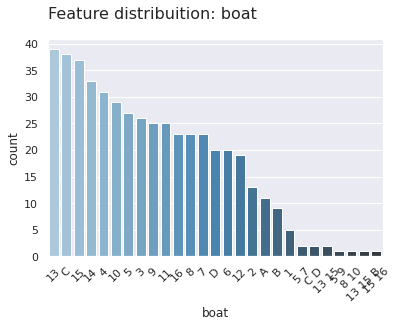

In [345]:
sns.barplot(
            data=df.boat.value_counts().reset_index().rename(columns={'index':'boat', 'boat':'count'}), 
            x='boat', y='count', palette='Blues_d'
            );
plt.title('Feature distribuition: boat', fontsize=16, pad=20, loc='left')
plt.xticks(rotation=45);

### body 
*Variable type*: -   
*info*: -  

In [346]:
explorer_feature(df, feature='body')

Dtype: object
Number of unique values: 121
Missing values: 1188


<AxesSubplot:>

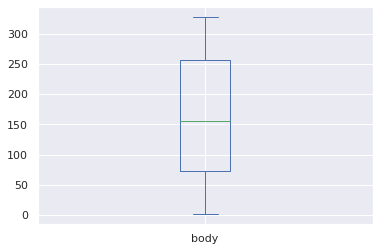

In [347]:
df.body.dropna().astype('int64').plot(kind='box')

### home.dest 
*Variable type*: -   
*info*: -  

In [348]:
explorer_feature(df, feature='home.dest')

Dtype: object
Number of unique values: 369
Missing values: 564


In [349]:
df.select_dtypes(include=np.number).head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


*Discrete*: pclass, survived  
*Continous*: sibsp, parch  

**Observations**
- foo

**Decisions**
- bar

*Categorical*:   
*Ordinal*: 

**Observations**
- foo

**Decisions**
- bar

Features with mixed data types, numerical an alphanumerical. These will be corrected later.

## <span id='target_dist' style='font-size:0.8em;color:#1696d2'>Target Distribuition</span>

In [350]:
#df.survived

## <span id='data_corr' style='font-size:0.8em;color:#1696d2'>Data Correlation</span>

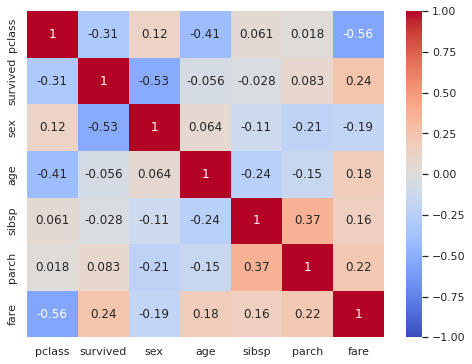

In [360]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

# <span id='baseline_model' style='font-size:0.8em;color:#fdbf11'>4. Baseline Model</span>

## <span id='data_prep' style='font-size:0.8em;color:#1696d2'>Prepare data for Baseline Model</span>

- All null values must be filled or removed  
- Select only features with numerical values

In [374]:
baseline_df = df.select_dtypes(include=np.number).dropna()
baseline_df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,0,29.0000,0,0,211.3375
1,1,1,1,0.9167,1,2,151.5500
2,1,0,0,2.0000,1,2,151.5500
3,1,0,1,30.0000,1,2,151.5500
4,1,0,0,25.0000,1,2,151.5500


In [372]:
baseline_df.shape[0] / df.shape[0] * 100

79.83193277310924

*Observation*
Excluing null values from numeric features only removed ~ 20% of data.

## <span id='baseline_reg_ling' style='font-size:0.8em;color:#1696d2'>Linear Regression</span>

In [386]:
# define features and targes
X = baseline_df.drop(columns=['survived'])
y = baseline_df['survived']

# split data into train/test
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
from sklearn.linear_model import LinearRegression

# instance and fit model
reg_lin = LinearRegression().fit(X, y)

reg_lin_data = {
    'model': reg_lin,
    'X_test': X_test,
    'X_train': X_train,
    'y_test': y_test,
    'y_train': y_train,
}

## <span id='baseline_metrics' style='font-size:0.8em;color:#1696d2'>Model Metrics</span>

In [379]:
print(f'Intercept (b0): {reg_lin.intercept_}')
print(f'Parameters (b1,...,bn): {reg_lin.coef_}')

Intercept (b0): 1.295886944422325
Parameters (b1,...,bn): [-1.75773246e-01 -4.92035044e-01 -5.94155921e-03 -5.21300524e-02
  9.54170222e-03  2.60017021e-04]


In [393]:
def make_prediction(model, X, y, data_type = 'Test', summary = True):

    y_pred = model.predict(X)
    if summary:
        print(f'{CYAN}{data_type} prediction:{WHITE}')
        print(f'R^2 score:{r2_score(y, y_pred):.2f}')
        print(f'MAE:{mean_absolute_error(y, y_pred):.2f}')
        print(f'RMSE:{np.sqrt(mean_squared_error(y, y_pred)):.2f}')

    return y_pred

In [394]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# train prediction
y_pred_train = make_prediction(reg_lin, X_train, y_train, data_type='Train')

# test prediction
y_pred = y_pred_train = make_prediction(reg_lin, X_test, y_test)

Train prediction:
R^2 score:0.26
MAE:0.34
RMSE:0.42
Test prediction:
R^2 score:0.40
MAE:0.30
RMSE:0.38


## <span id='baseline_poly' style='font-size:0.8em;color:#1696d2'>Polynomial Regression</span>

In [396]:
from sklearn.preprocessing import PolynomialFeatures

In [410]:
def create_poly_regression(X, y, dg=1, summary=False):

    # split train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # instancing poly class
    poly = PolynomialFeatures(degree=dg, include_bias=False)

    # fit train data
    poly.fit(X_train)
    if summary:
        print(f'{CYAN}Original features:{WHITE} {poly.n_features_in_}')
        print(f'{CYAN}Current features in the transformed space:{WHITE} {poly.n_output_features_}')

    # transform train and test data
    X_train = poly.transform(X_train)
    X_test = poly.transform(X_test)

    # create and fit model
    reg_lin = LinearRegression()
    reg_lin.fit(X_train, y_train)

    # trainning prediction
    y_pred_train = make_prediction(reg_lin, X_train, y_train, data_type='Train', summary=summary)

    # test prediction
    y_pred = make_prediction(reg_lin, X_test, y_test, summary=summary)

    return pd.DataFrame({
                        'Features' : poly.n_output_features_,
                        'MAE_train' : mean_absolute_error(y_train, y_pred_train),
                        'MAE_test' : mean_absolute_error(y_test, y_pred)
                    }, index=['features'])

In [420]:
poly_results = pd.DataFrame()

for degree in range(1,6): 
    poly_results = pd.concat([poly_results, create_poly_regression(X, y, dg=degree)])

In [421]:
poly_results.reset_index(drop=True, inplace=True)
poly_results

,Features,MAE_train,MAE_test
0,6,0.290433,0.334983
1,27,0.272176,0.326610
2,83,0.248545,0.314777
3,209,0.232026,0.337721
4,461,0.247943,2.431982


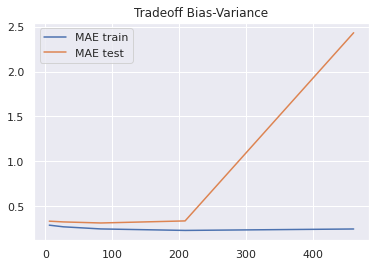

In [423]:
plt.plot(poly_results['Features'], poly_results['MAE_train'], label='MAE train')
plt.plot(poly_results['Features'], poly_results['MAE_test'], label='MAE test')
plt.legend()
plt.title('Tradeoff Bias-Variance');

# <span id='data_wrangling' style='font-size:0.8em;color:#fdbf11'>5. Data wrangling</span>

# <span id='modeling' style='font-size:0.8em;color:#fdbf11'>6. Model Pipeline</span>

In [25]:
import re

In [53]:
url_pattern = re.compile('(http(s)?://)?(www.)?byteba**.com(.br)?/cambio')
url_pattern.match('"bytebank.com/cambio')

error: multiple repeat at position 28

In [49]:
end = 'Batat potatato bacon 19234-930'

pattern = re.compile('[0-9]{5}-?[0-9]{3}')
result = pattern.search(end)
if result: result.group()
_

'19234-930'